## Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor,KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.decomposition import PCA

# warning library 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Breast_Cancer.csv")

## Descriptive Statistics

In [3]:
# Preview data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Dataset dimensions -(rows, columns)
data.shape

(569, 33)

In [5]:
# Features data-type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Statisctical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
# Count of null values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Observations:
1)There are a total of 569 records and 33 features in the dataset.<br>
2)Each feature can be integer, float or object datatype.<br>
3)There are zero NaN values in the dataset.<br>
4)n the outcome column, M represents malignant cancer and B represents benign cancer.<br>

## Data Preprocessing

In [8]:
data.drop(["Unnamed: 32","id"], inplace=True, axis=1)
data=data.rename(columns = {"diagnosis":"target"})

B    357
M    212
Name: target, dtype: int64


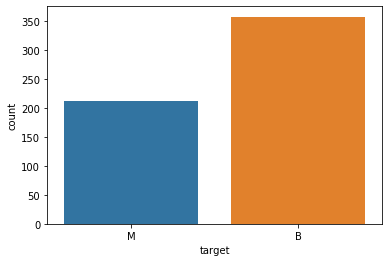

In [9]:
# Data count plot
sns.countplot(data["target"])
print(data.target.value_counts())

In [10]:
# Target feature change to as 0 and 1
data["target"]=[1 if i.strip()=="M" else 0 for i in data.target]

## Explorer Data Analysis

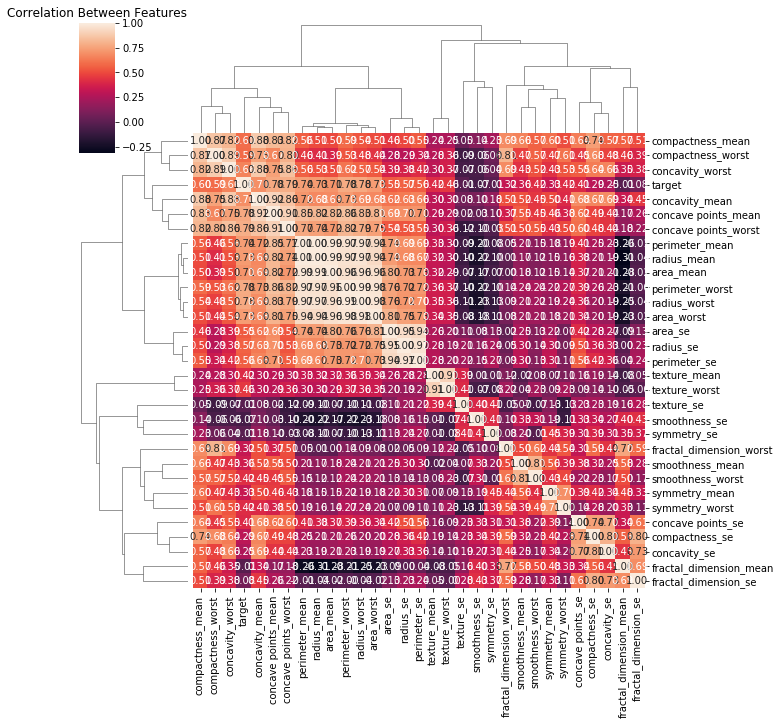

In [11]:
# Correlation
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

Text(0.5, 1, 'Correlation Between Features with Corr Threshold 0.75')

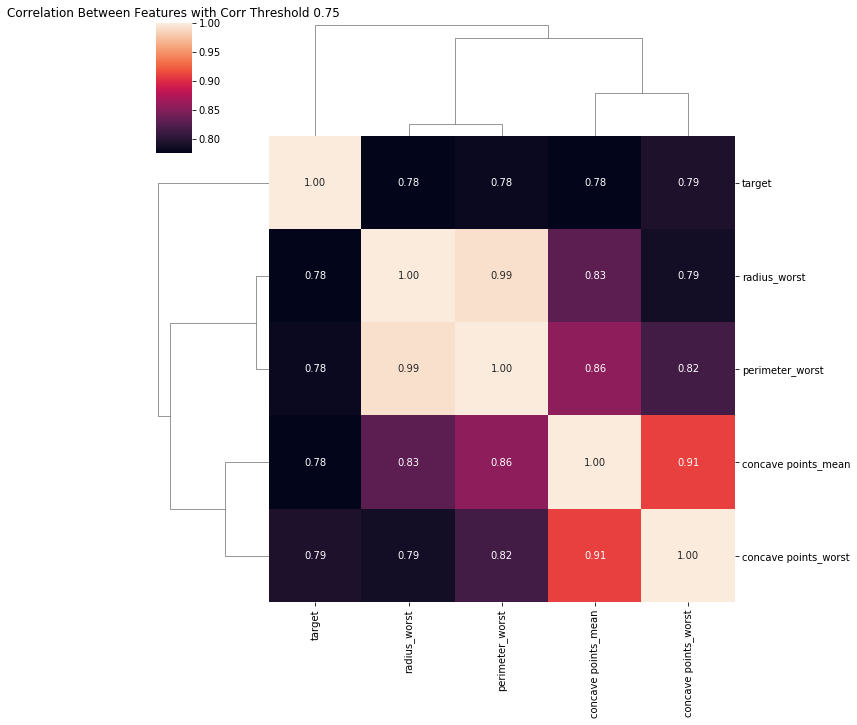

In [12]:
# Correllation with threshold 0.75
threshold = 0.75
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features with Corr Threshold 0.75")


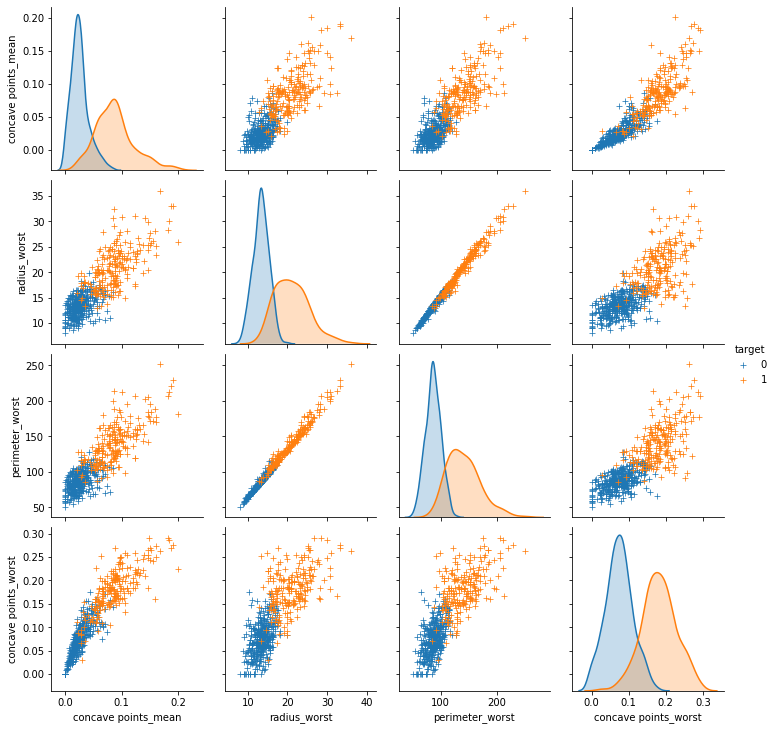

In [13]:
# Pair plot
sns.pairplot(data[corr_features],diag_kind="kde", markers = "+", hue="target")
plt.show()

## Outlier Detection

In [14]:
y = data.target
x = data.drop(["target"],axis=1)
columns = x.columns.tolist()
clf = LocalOutlierFactor()
isOutlier = clf.fit_predict(x)
Xscore = clf.negative_outlier_factor_
outlier_score = pd.DataFrame(Xscore,columns=["score"])

In [15]:
# Threshold for outlier
threshold =-2.5
filt = outlier_score["score"] < threshold
outlier_index= outlier_score[filt].index.tolist()

In [16]:
# Drop outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

## Train Test Split

In [17]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=test_size, random_state=42)

## Standardization

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_df = pd.DataFrame (X_train, columns = columns)
X_train_df["target"] = Y_train

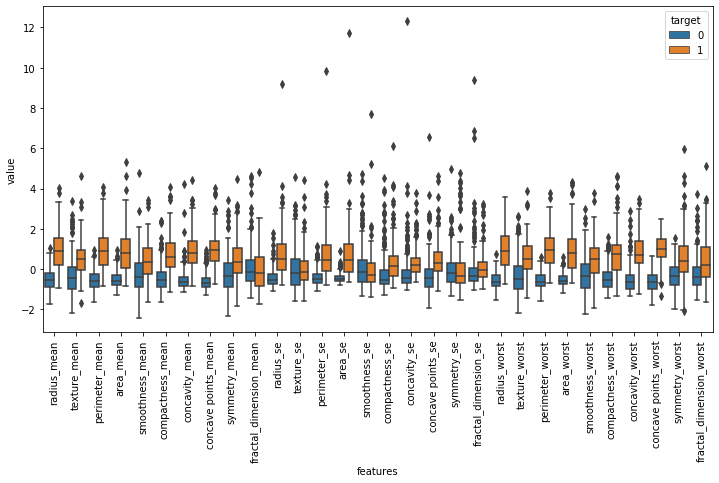

In [19]:
# Box plot
data_melted = pd.melt(X_train_df,id_vars = "target",
                      var_name = "features",
                      value_name = "value")
plt.figure(figsize=(12, 6))
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation=90)
plt.show()

## Basic KNN Method

In [20]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix (Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
print("CM: ", cm)
print("Basic KNN Acc: ", acc)

CM:  [[108   1]
 [  7  55]]
Basic KNN Acc:  0.9532163742690059


## Choose Best Parameters

In [21]:
def KNN_Best_Params (x_train, x_test, y_train, y_test):
        k_range = list(range(1,31))
        weight_options = ["uniform","distance"]
        p = [1,2]
        print()
        param_grid = dict(n_neighbors = k_range, weights = weight_options, p = p)
        
        knn = KNeighborsClassifier()
        grid = GridSearchCV(knn, param_grid, cv=10, scoring = "accuracy")
        grid.fit(x_train, y_train)
        print("Best training score: {} with parameters: {}".format(grid.best_score_, grid.best_params_))
        print()
        
        knn = KNeighborsClassifier(**grid.best_params_)
        knn.fit(x_train, y_train)
        y_pred_test = knn.predict(x_test)
        y_pred_train = knn.predict(x_train)
        cm_test = confusion_matrix (y_test, y_pred_test)
        cm_train = confusion_matrix (y_train, y_pred_train)
        acc_test=accuracy_score(y_test, y_pred_test)
        acc_train=accuracy_score(y_train, y_pred_train)
        print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
        print()
        print("CM test: ",  cm_test)
        print("CM train: ",  cm_train)
        
        return grid
        
grid =  KNN_Best_Params(X_train, X_test, Y_train, Y_test)


Best training score: 0.9696153846153847 with parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

Test Score: 0.9590643274853801, Train Score: 0.9773299748110831

CM test:  [[106   3]
 [  4  58]]
CM train:  [[247   1]
 [  8 141]]


## PCA

Text(0.5, 1.0, 'PCA: p1 vs p2')

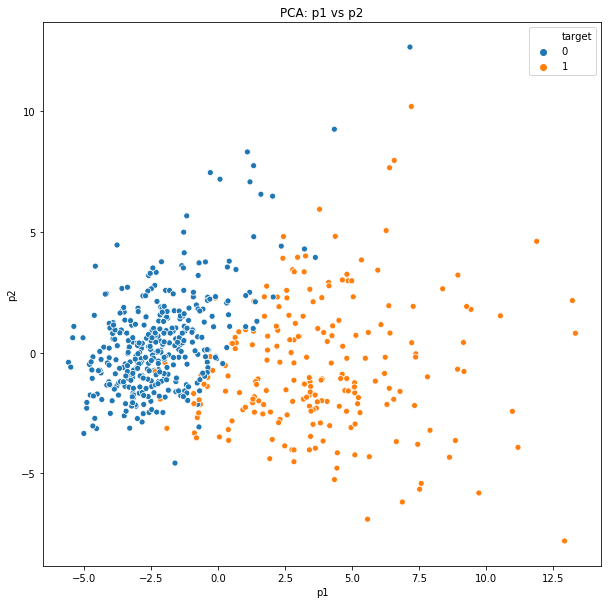

In [22]:
# Since pca is unsupervised, scale operation is done on all data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame (X_reduced_pca, columns = ["p1", "p2"])
pca_data["target"]=y
plt.subplots(figsize=(10, 10))
sns.scatterplot(x = "p1", y="p2", hue="target", data = pca_data)
plt.title("PCA: p1 vs p2")

In [23]:
# Ratio of variables to explain the data set
print(pca.explained_variance_ratio_)
# What percentage of the variables explain the data set completely
print(sum(pca.explained_variance_ratio_))

[0.44250777 0.18982257]
0.6323303363928741


In [24]:
# KNN with reduced dimensionality
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca ,y, test_size=test_size, random_state=42)
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)


Best training score: 0.9419230769230769 with parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

Test Score: 0.9239766081871345, Train Score: 0.947103274559194

CM test:  [[103   6]
 [  7  55]]
CM train:  [[241   7]
 [ 14 135]]


## NCA


Best training score: 0.9898717948717948 with parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

Test Score: 0.9941520467836257, Train Score: 1.0

CM test:  [[108   1]
 [  0  62]]
CM train:  [[248   0]
 [  0 149]]


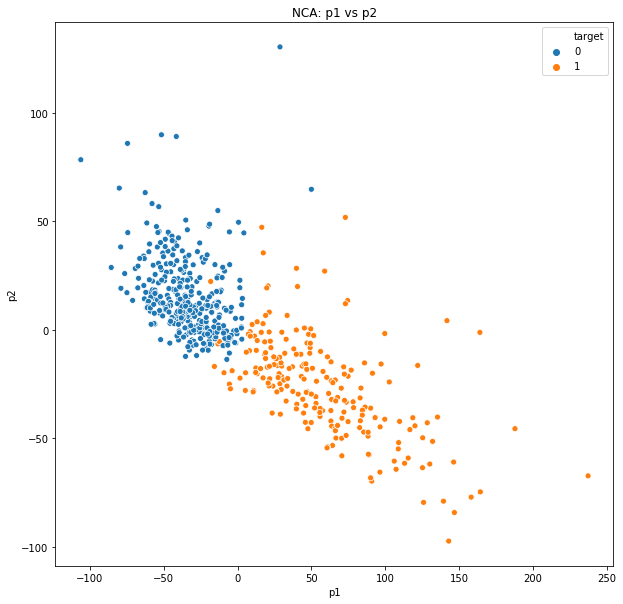

In [25]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state=42)
nca.fit(x_scaled,y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame (X_reduced_nca, columns = ["p1", "p2"])
nca_data["target"]=y
plt.subplots(figsize=(10, 10))
sns.scatterplot(x = "p1", y="p2", hue="target", data = nca_data)
plt.title("NCA: p1 vs p2")

X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca ,y, test_size=test_size, random_state=42)
grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)